In [3]:
#!pip install --user tensorflow
!python.exe -m pip install tensorflow --user

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import pandas as pd



In [8]:
# Caricamento dei dati
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Puoi lavorare direttamente su train
df = train.copy()

# 1️⃣ Convertire Sex in numerico
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# 2️⃣ Gestire valori mancanti in Age
print("Valori mancanti in Age:", df['Age'].isnull().sum())
df['Age'].fillna(df['Age'].median(), inplace=True)

# 3️⃣ Valutare la colonna Cabin (eliminarla)
print("Percentuale valori mancanti in Cabin:", df['Cabin'].isnull().sum() / len(df))
df.drop('Cabin', axis=1, inplace=True)

# 4️⃣ Gestire Embarked
print("Valori mancanti in Embarked:", df['Embarked'].isnull().sum())
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# 🔎 Controllo finale
print(df.isnull().sum())
df.head()

Valori mancanti in Age: 177
Percentuale valori mancanti in Cabin: 0.7710437710437711
Valori mancanti in Embarked: 2
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked_Q     0
Embarked_S     0
dtype: int64


C:\Users\net.SIS-03\AppData\Local\Temp\ipykernel_1132\2874701378.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\net.SIS-03\AppData\Local\Temp\ipykernel_1132\2874701378.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,True


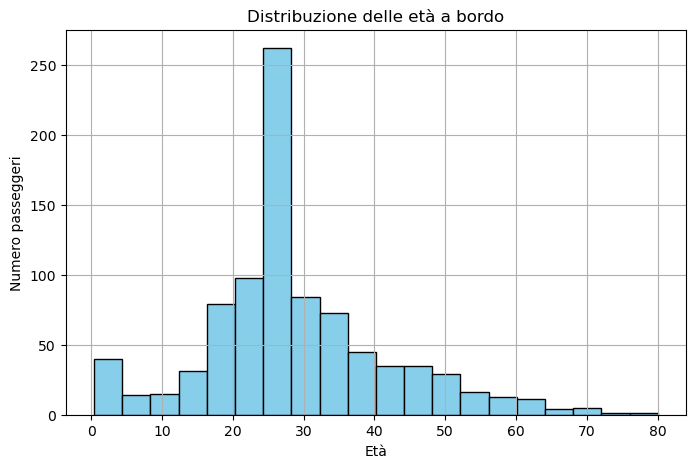

In [9]:
plt.figure(figsize=(8,5))
df["Age"].hist(bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Età")
plt.ylabel("Numero passeggeri")
plt.title("Distribuzione delle età a bordo")
plt.show()

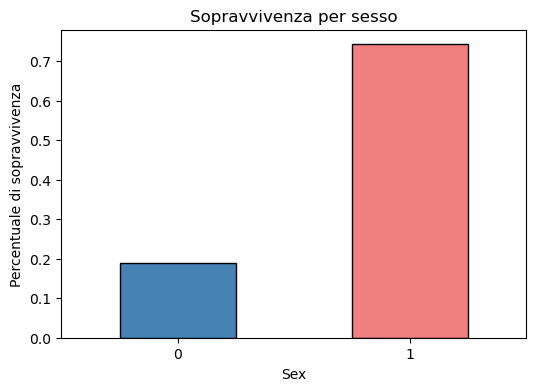

In [10]:
plt.figure(figsize=(6,4))
df.groupby("Sex")["Survived"].mean().plot(kind="bar", color=['steelblue','lightcoral'], edgecolor='black')
plt.ylabel("Percentuale di sopravvivenza")
plt.title("Sopravvivenza per sesso")
plt.xticks(rotation=0)
plt.show()

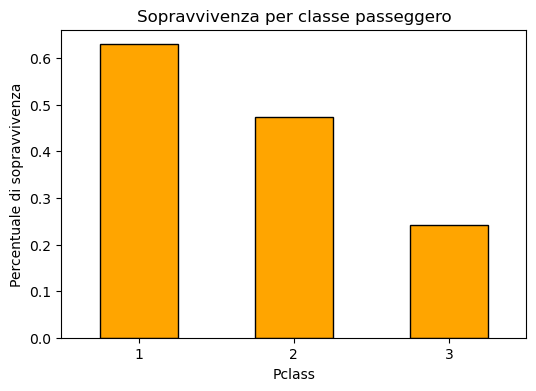

In [11]:
plt.figure(figsize=(6,4))
df.groupby("Pclass")["Survived"].mean().plot(kind="bar", color='orange', edgecolor='black')
plt.ylabel("Percentuale di sopravvivenza")
plt.title("Sopravvivenza per classe passeggero")
plt.xticks(rotation=0)
plt.show()


<Figure size 800x500 with 0 Axes>

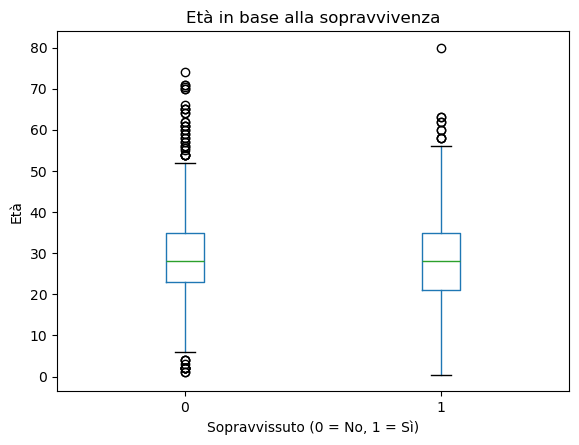

In [12]:
plt.figure(figsize=(8,5))
df.boxplot(column="Age", by="Survived", grid=False)
plt.title("Età in base alla sopravvivenza")
plt.suptitle("")  # Rimuove il titolo automatico di pandas
plt.xlabel("Sopravvissuto (0 = No, 1 = Sì)")
plt.ylabel("Età")
plt.show()


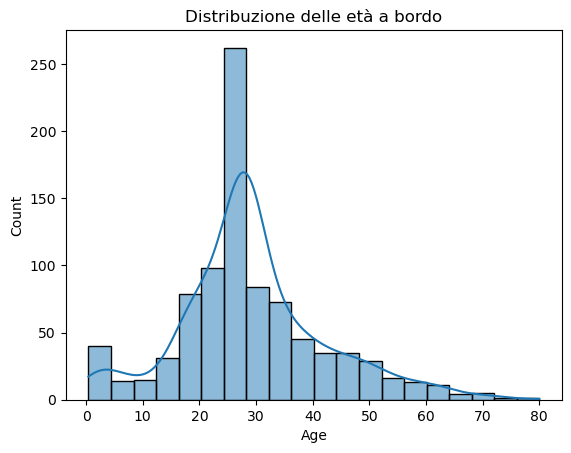

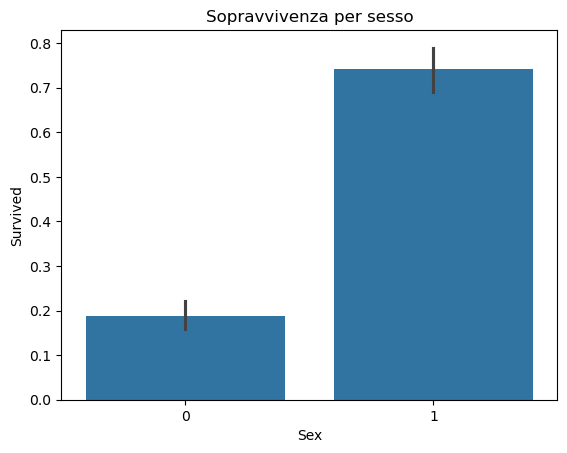

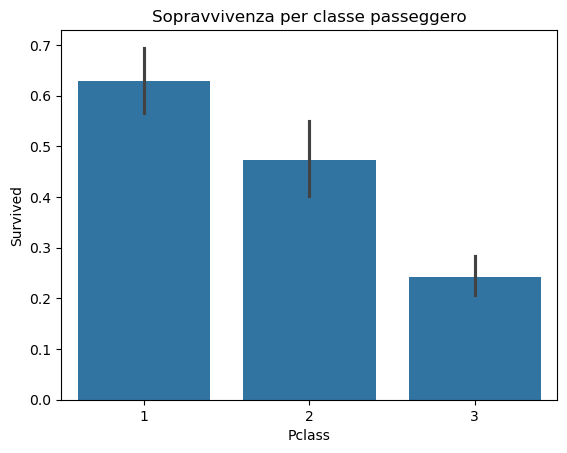

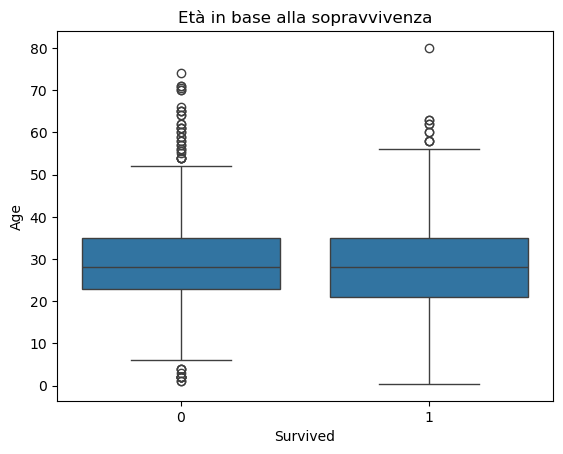

In [13]:
import seaborn as sns

# Distribuzione età
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Distribuzione delle età a bordo")
plt.show()

# Sopravvivenza per sesso
sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Sopravvivenza per sesso")
plt.show()

# Sopravvivenza per classe
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Sopravvivenza per classe passeggero")
plt.show()

# Boxplot Età vs Sopravvivenza
sns.boxplot(x="Survived", y="Age", data=df)
plt.title("Età in base alla sopravvivenza")
plt.show()